In [14]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pandas-profiling

     |████████████████████████████████| 261 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 33.0 MB/s eta 0:00:01
     |████████████████████████████████| 667 kB 36.6 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 69.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 55.0 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 62.9 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a825282a7e4217f1733e8138dde7b00478952b8a7d765bcb692a45704b7b0b8c
  Stored in directory: /Users/kanchanas/Library/Caches/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=b61fe0659633e2abfe6033ac6088c742bc52e3b2524f2f3ef553cf287876a09a
  Stored in directory: /Users/kanchanas/Library/Caches/pip/wheels/48/a1/7f/096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built ht

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

### Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

Data Dictionary

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in USD

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available \u2013 Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [31]:
# Link to data source: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?resource=download

# Initial Data Exploration

In [76]:
df = pd.read_csv('/Users/kanchanas/Desktop/supermarket_sales - Sheet1.csv')

In [77]:
df.head(5) #first 5 rows

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [78]:
df.tail(5) #last 5 rows

Invoice ID Branch       City Customer type  Gender         Product line  \
995  233-67-5758      C  Naypyitaw        Normal    Male    Health and beauty   
996  303-96-2227      B   Mandalay        Normal  Female   Home and lifestyle   
997  727-02-1313      A     Yangon        Member    Male   Food and beverages   
998  347-56-2442      A     Yangon        Normal    Male   Home and lifestyle   
999  849-09-3807      A     Yangon        Member  Female  Fashion accessories   

     Unit price  Quantity   Tax 5%      Total       Date   Time  Payment  \
995       40.35         1   2.0175    42.3675  1/29/2019  13:46  Ewallet   
996       97.38        10  48.6900  1022.4900   3/2/2019  17:16  Ewallet   
997       31.84         1   1.5920    33.4320   2/9/2019  13:22     Cash   
998       65.82         1   3.2910    69.1110  2/22/2019  15:33     Cash   
999       88.34         7  30.9190   649.2990  2/18/2019  13:28     Cash   

       cogs  gross margin percentage  gross income  Rating  
995   40.35                 4.761905        2.0175     6.2  
996  973.80                 4.761905       48.6900     4.4  
997   31.84                 4.761905        1.5920     7.7  
998   65.82                 4.761905        3.2910     4.1  
999  618.38                 4.761905       30.9190     6.6

In [79]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [80]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [81]:
df['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [82]:
df['Date'] = pd.to_datetime(df['Date'])

In [83]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [84]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [85]:
df.set_index('Date',inplace=True) #inplace "true" since it is a permanent change

In [86]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69         7  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28         5   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33         7  16.2155  340.5255   
2019-01-27       Health and beauty       58.22         8  23.2880  489.0480   
2019-02-08       Sports and travel       86.31         7  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [87]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

*** For every numerical column (float), it calculates summary statistics.

# Univariate Analysis

*Question 1: What does the distribution of customer ratings look like? Is it skewed?

In [90]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

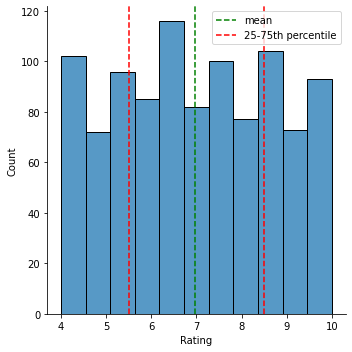

In [104]:
sns.displot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='green',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='red',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='red',ls='--')
plt.legend()

*The distribution of ratings looks to be relatively uniform and there does not seem to be any skew in the left or right direction.

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

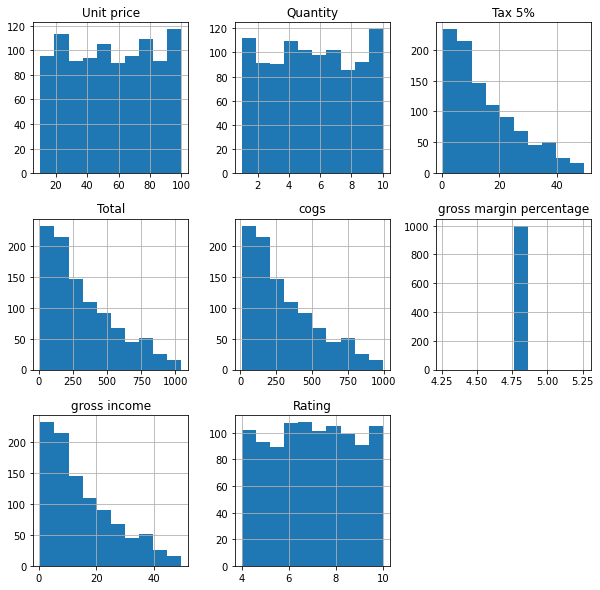

In [106]:
df.hist(figsize=(10,10))

*** Question 2: Do aggregate sales numbers differ by much between branches?

/Users/kanchanas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

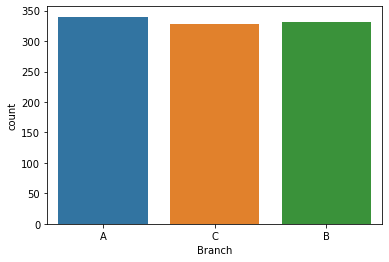

In [107]:
sns.countplot(df['Branch'])

In [109]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

*The aggreage sale numbers do not differ by much between branches.

# Bivariate Analysis

### Question 3a: Is there a relationship between gross income and customer ratings?

/Users/kanchanas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

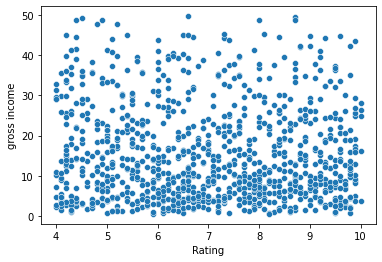

In [110]:
sns.scatterplot(df['Rating'],df['gross income'])  

/Users/kanchanas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

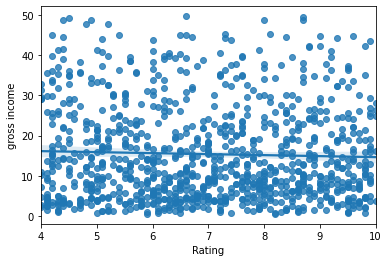

In [111]:
sns.regplot(df['Rating'],df['gross income']) #for a trend line

* The trend line is flat. There seems to be no relationship between gross income and Rating.

### Question 3b: Is there a relationship between branches and gross income?

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

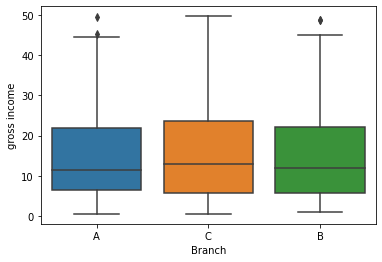

In [116]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

*There does not seem to be a big difference between the branches.

### Question 3c: Is there a relationship between gender and customer ratings?

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

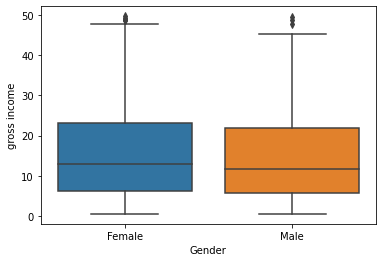

In [117]:
sns.boxplot(x=df['Gender'],y=df['gross income'])

*The men and women in this dataset look to spend about the same. However, a noticeable difference is that at the 75th percentile women spend more than men. On average (when comparing the means), they look to be relatively similar.

### Question 4: Is there a noticeable time trend in gross income?

In [118]:
df.groupby(df.index).mean()  #each date is unique and it represents the average variable value for that day

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.750000  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  6.090909  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

/Users/kanchanas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='gross income'>

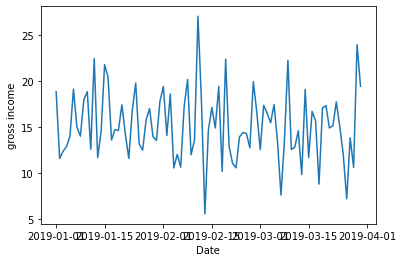

In [122]:
sns.lineplot(df.groupby(df.index).mean().index,
            y=df.groupby(df.index).mean()['gross income'])

There doesn't look to be a noticeable time trend and it looks to vary around the same mean. There are some days with high gross incomes and some days with lower gross incomes. This could be attributed to the fact that this is a 3 month dataset.

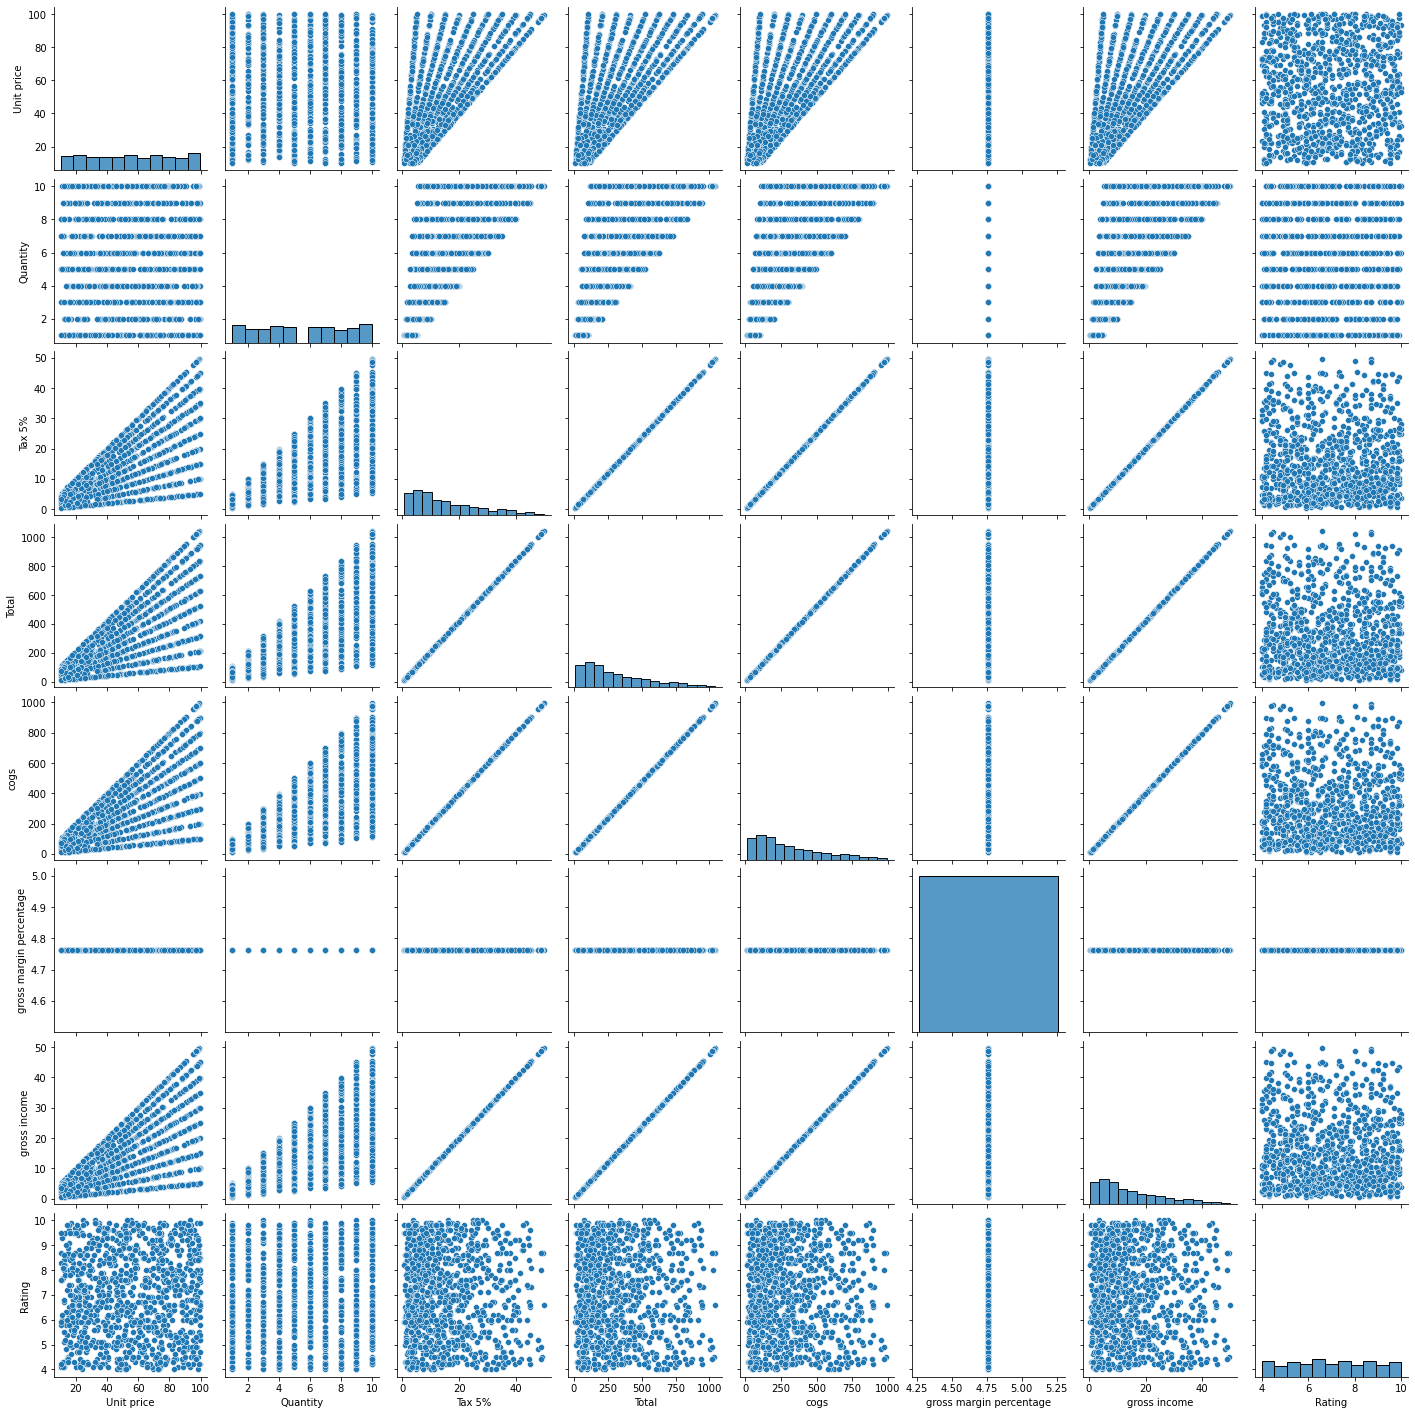

In [126]:
#To plot all the bivariate relationships possible (Not recommended for large datasets as it is time consuming)
sns.pairplot(df)

# Duplicate Rows and Missing Values

In [128]:
df.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-01-29    False
2019-03-02    False
2019-02-09    False
2019-02-22    False
2019-02-18    False
Length: 1000, dtype: bool

*The bottome 3 rows look to be duplicated.

In [129]:
df.duplicated().sum()

0

In [132]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

*There look to be no missing values.

In [134]:
#To see the ratio of missingness
df.isna().sum()/len(df)

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

<AxesSubplot:ylabel='Date'>

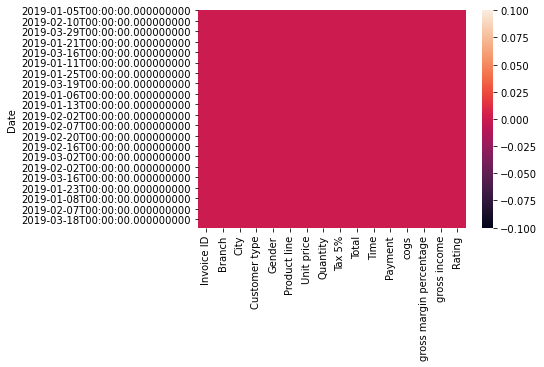

In [135]:
sns.heatmap(df.isna())

In [137]:
df.mode().iloc(0)

In [141]:
#After cleaning the dataset and to create a new csv - feasible for a small or sizeable dataset
dataset = pd.read_csv('/Users/kanchanas/Desktop/supermarket_sales - Sheet1.csv')
Prof = ProfileReport(dataset)
Prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Analysis

In [142]:
np.corrcoef(df['gross income'],df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

*There is no significant correlation. It is in the negative direction, but it is only -0.03

In [146]:
np.corrcoef(df['gross income'],df['Rating'])[1][0]

-0.03644170499701834

In [147]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][0],2)

-0.04

In [148]:
df.corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962 -0.008778  
Quantity                                     NaN      0.705510 -0.015815  
Tax 5%                                       NaN      1.000000 -0.036442  
Total                                        NaN      1.000000 -0.036442  
cogs                                         NaN      1.000000 -0.036442  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.036442  
Rating                                       NaN     -0.036442  1.000000

In [149]:
np.round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.71   0.71  0.71   
Tax 5%                         0.63      0.71    1.00   1.00  1.00   
Total                          0.63      0.71    1.00   1.00  1.00   
cogs                           0.63      0.71    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.71    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.71   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<AxesSubplot:>

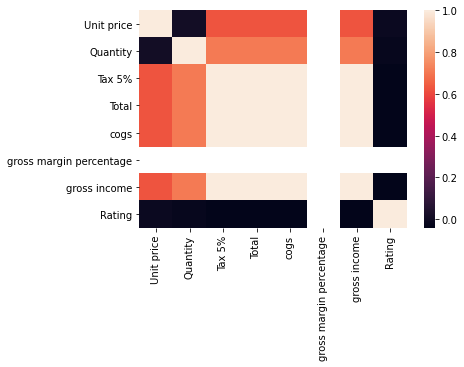

In [150]:
sns.heatmap(np.round(df.corr(),2))

<AxesSubplot:>

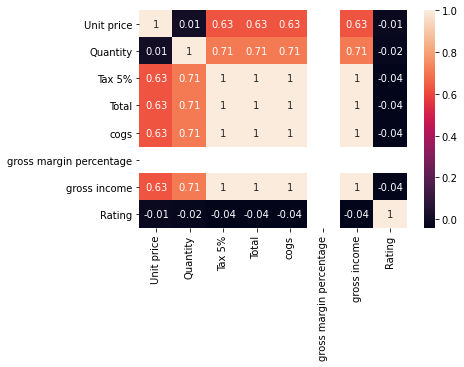

In [154]:
sns.heatmap(np.round(df.corr(),2),annot=True)   #more detailed information